In [2]:
import numpy as np
import matplotlib.pyplot as plt
from misc import reportProgress
from scipy.ndimage.filters import gaussian_filter
from misc import round_sig_str as round_sig_str
import misc
import blurringFunctions_testingnewminblur as bf
import MarksConstants as mc
from importlib import reload
import imageBlurring as ib
import cameraSimulation as cs
import Analysis_Python_Files.AnalysisHelpers as ah

In [15]:
size = 32
p0=int(size/2)
zTotalSize = 5e-6
timeStep = 1
time = 2*timeStep
numZPoints = 50

#### 1. Calculate PSF (basically, measure via 2D Gaussian fit of early image straight from M's model)
#### 2. Then run DOF on the early image and measure PSF on that image
#### 3. Compare the waists or sigmas

In [21]:
def reportProgress(num, total):
    print( round_sig_str(num/total*100) + '%                     ',  end='\r' )
    IPython.display.clear_output(wait=True)

In [30]:
n1Array = np.load('N1Expansion.npy')
print(n1Array.shape)

(51, 2000, 2000)


In [31]:
array3D = np.zeros((numZPoints,100,100))
dzPos = np.linspace(-zTotalSize/2, zTotalSize/2, num=numZPoints)
xySlice = n1Array[timeStep]
print(xySlice.shape)

(2000, 2000)


4.8718368263066376e-08


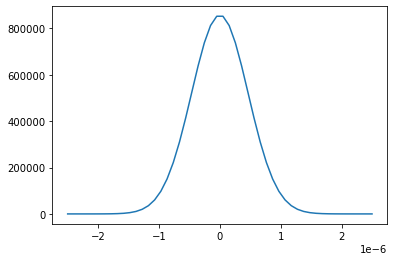

In [32]:
def zGaussian(t, z):
    sigma_x_0 = np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*49e3))
    sigma_v = np.sqrt(mc.hbar*np.pi*49e3/mc.Rb87_M)
    sigma  = np.sqrt(sigma_v**2*(t*1e-6)**2 + sigma_x_0**2)
    sig = 0.465e-6
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(z)**2/(2*sig**2))
plt.plot(dzPos, zGaussian(time, dzPos))
print(np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*49e3)))

In [33]:
waveFunctionSlices = []
for i, zSlice in enumerate(array3D):
    zSlice = xySlice*zGaussian(time, dzPos[i])
    waveFunctionSlices.append(zSlice)
#print(waveFunctionSlices)
waveFunctionSlices = np.array(waveFunctionSlices)
print(waveFunctionSlices.shape)

(50, 2000, 2000)


#### "Raw" wavefunction (prior to adding blur effects)

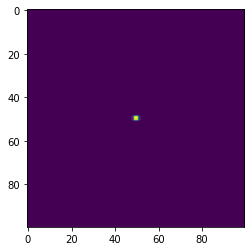

In [34]:
binnedwvftn = cs.softwareBinning([20,20], waveFunctionSlices)
plt.imshow(binnedwvftn[25])

##### Calculate PSF via 2D Gaussian fit (4/26/21 for ex)

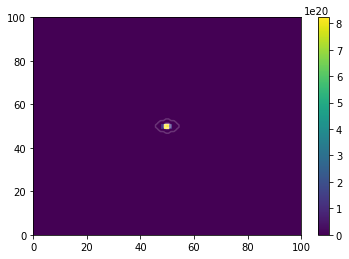

In [35]:
fittedWvftn = ah.fitPic(binnedwvftn[25])

In [36]:
extractedSigmax = fittedWvftn[1][3]
print(extractedSigmax)
extractedSigmay = fittedWvftn[1][4]
print(extractedSigmay)

sigmaxy = np.sqrt((extractedSigmax**2) + (extractedSigmay**2))
print(sigmaxy)

uncertx = fittedWvftn[2][3]
uncerty = fittedWvftn[2][4]
uncertxy = sigmaxy*np.sqrt(((uncertx/extractedSigmax)**2) + ((uncerty/extractedSigmax)**2))
print(uncertxy)

0.7116513298563711
0.4950825588552839
0.8669223467929738
0.00011450508839875751


#### Blurred wavefunction (added 3D blur effects)

Text(0.5, 1.0, 'TOF = 2 us')

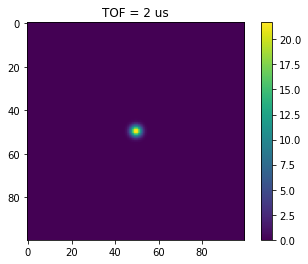

In [37]:
blurredwvftn = bf.XYZ_Blur(binnedwvftn)*1e-20
plt.imshow(blurredwvftn)
plt.colorbar()
plt.title('TOF = 2 us')

##### Calculate PSF via 2D Gaussian fit 

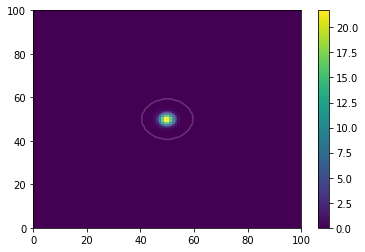

In [36]:
fittedWvftn = ah.fitPic(blurredwvftn)

In [37]:
extractedSigmax = fittedWvftn[1][3]
print(extractedSigmax)
extractedSigmay = fittedWvftn[1][4]
print(extractedSigmay)

sigmaxy = np.sqrt((extractedSigmax**2) + (extractedSigmay**2))
print(sigmaxy)

uncertx = fittedWvftn[2][3]
uncerty = fittedWvftn[2][4]
uncertxy = sigmaxy*np.sqrt(((uncertx/extractedSigmax)**2) + ((uncerty/extractedSigmax)**2))
print(uncertxy)

1.7592201688639322
1.7001837210348425
2.4465241236925346
3.408873443237253e-05


#### z-blurred wavefunction

Text(0.5, 1.0, 'TOF = 2 us')

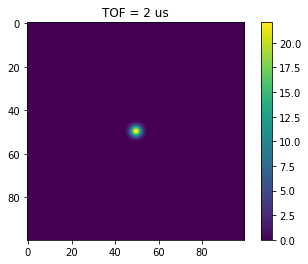

In [108]:
blurredwvftn = bf.XYZ_Blur(binnedwvftn,xyDepBlur = False)*1e-20
plt.imshow(blurredwvftn)
plt.colorbar()
plt.title('TOF = 2 us')

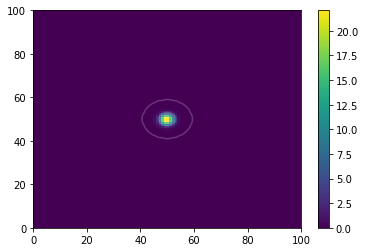

In [109]:
fittedWvftn = ah.fitPic(blurredwvftn)

In [110]:
extractedSigmax = fittedWvftn[1][3]
print(extractedSigmax)
extractedSigmay = fittedWvftn[1][4]
print(extractedSigmay)

sigmazxy = np.sqrt((extractedSigmax**2) + (extractedSigmay**2))
print(sigmazxy)

uncertx = fittedWvftn[2][3]
uncerty = fittedWvftn[2][4]
uncertxy = sigmaxy*np.sqrt(((uncertx/extractedSigmax)**2) + ((uncerty/extractedSigmax)**2))
print(uncertxy)

1.7409765822356185
1.6813547109334859
2.420320872089286
1.8142298133817753e-05


In [ ]:
blurredimg = np.convolve()

#### PSF as convolver

In [11]:
import scipy.signal

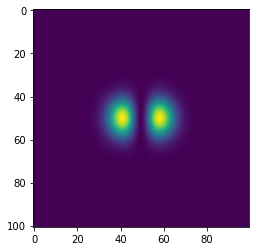

In [43]:
PSFconvolvedImg = scipy.signal.convolve2d(binnedwvftn[25], [[1.671], [1.423]])
plt.imshow(PSFconvolvedImg)

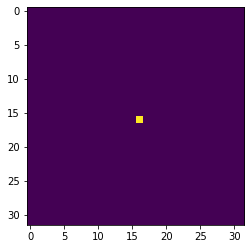

In [28]:
testDelta = np.zeros((size,size,size))
testDelta[0,p0,p0]=1
plt.imshow(testDelta[0])

In [21]:

dzPos = np.linspace(-zTotalSize/2, zTotalSize/2, num=numZPoints)
xySlice = testDelta[timeStep]
print(xySlice.shape)

(32, 32)


4.8718368263066376e-08


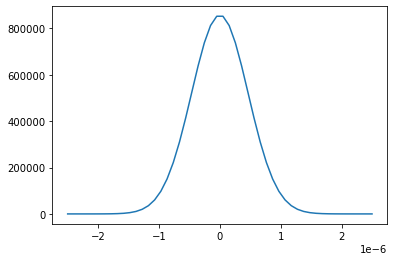

In [22]:
def zGaussian(t, z):
    sigma_x_0 = np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*49e3))
    sigma_v = np.sqrt(mc.hbar*np.pi*49e3/mc.Rb87_M)
    sigma  = np.sqrt(sigma_v**2*(t*1e-6)**2 + sigma_x_0**2)
    sig = 0.465e-6
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp(-(z)**2/(2*sig**2))
plt.plot(dzPos, zGaussian(time, dzPos))
print(np.sqrt(mc.hbar/(mc.Rb87_M*2*np.pi*49e3)))

In [23]:
deltaSlices = []
for i, zSlice in enumerate(testDelta):
    zSlice = xySlice*zGaussian(time, dzPos[i])
    deltaSlices.append(zSlice)
#print(waveFunctionSlices)
deltaSlices = np.array(deltaSlices)
print(deltaSlices.shape)

(32, 32, 32)


In [25]:
blurredDelta = bf.XYZ_Blur(deltaSlices)
plt.imshow(blurredDelta)
plt.colorbar()
plt.title('TOF = 2 us')

IndexError: index 32 is out of bounds for axis 0 with size 32

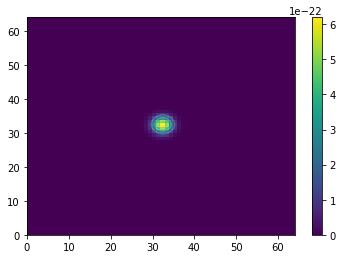

In [12]:
fittedDelta = ah.fitPic(blurredDelta)

In [13]:
extractedSigmax = fittedDelta[1][3]
print(extractedSigmax)
extractedSigmay = fittedDelta[1][4]
print(extractedSigmay)

sigmazxy = np.sqrt((extractedSigmax**2) + (extractedSigmay**2))
print(sigmazxy)

uncertx = fittedDelta[2][3]
uncerty = fittedDelta[2][4]
uncertxy = sigmaxy*np.sqrt(((uncertx/extractedSigmax)**2) + ((uncerty/extractedSigmax)**2))
print(uncertxy)

1.6278121398645238
1.6278121398645238
2.302074005191979


NameError: name 'sigmaxy' is not defined